<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 28.6 MB/s 
     |████████████████████████████████| 9.8 MB 49.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# SARIMA based month ahead forecasting of electricity cost
#Import necessary dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

In [ ]:
data = pd.read_csv('/content/BE_P.csv', usecols=[2], engine='python').dropna() # Read data file
original = data[' Prices'] # Get historical data
original=original[:52416].to_numpy()

In [ ]:
train=original[:34944] # Training data
test=original[34944:] # Test data
p =np.zeros(110)
# Train model and predict
for i in range(len(original)-len(train)):
    model = pm.auto_arima(original[i:420+i], start_p=1, start_q=1,
                      test='adf',       # use adf test to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=0, 
                      alpha=0.05,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    p[i]=model.predict(n_periods = 1, return_conf_int=True)[0]

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2697.655, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2791.859, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2698.944, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2702.041, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2789.923, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2697.236, Time=0.49 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2696.196, Time=0.59 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=2587.560, Time=1.59 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=2569.419, Time=3.04 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.44 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=5.73 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=2631.638, Time=2.33 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2567.693, Time=2.41 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept

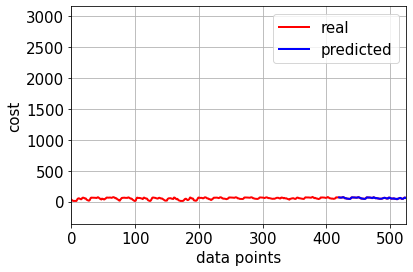

In [ ]:
index_of_fc = range(34944,52416)

# make series for plotting purpose
fc_series = pd.Series(p, index=index_of_fc)

# Plot

plt.plot(original,'r',lw =2)
plt.plot(fc_series, color='b',lw=2)
plt.xlim([0,525])
plt.xlabel('data points', fontsize =15)
plt.ylabel('cost',fontsize =15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['real','predicted'],prop={'size': 15})
plt.grid()
plt.savefig('arima', dpi=300)

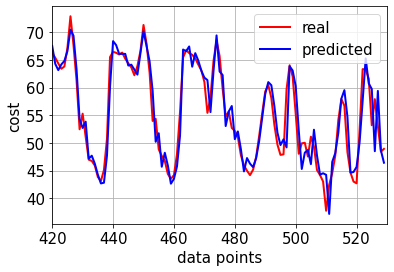

In [ ]:
plt.plot(range(34944,52416),original[34944:52416],'r',lw=2)
plt.plot(range(34944,52416),p, color='b',lw=2)
plt.xlim([34944,52416])
plt.xlabel('data points', fontsize =15)
plt.ylabel('cost', fontsize =15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['real','predicted'],prop={'size': 15})
plt.grid()
plt.savefig('zoomedarima', dpi=300)

In [ ]:
rmse = (np.sum((original[34944,52416]-p)**2)/len(p))**(1/2)
rmse

2.877148384892503